# Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.DescriptorProcess import maxminscale,box_cox_trans,de_box_cox_trans,\
log_trans,de_log_trans,ee2ddG,ddG2ee
    

# Load Data

In [2]:
dataset = pd.read_csv('./datasets/dataset.csv',index_col=0)
ee = dataset['ee'].to_numpy()
T = dataset['Temperature'].to_numpy()+273.15

# Perform Target Transformation

## Original Distribution

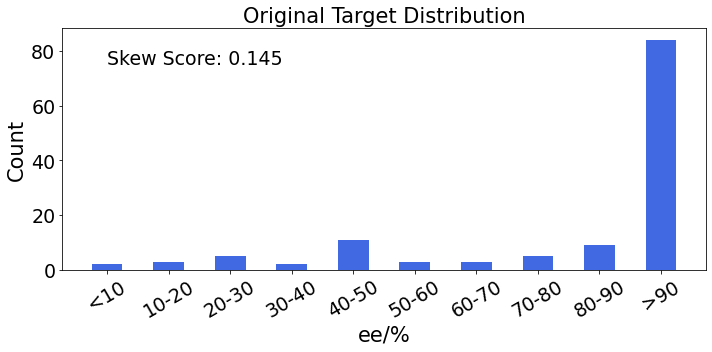

In [3]:
grouped_value = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1:0}
transformed_target = ee
color = 'royalblue'
for target in transformed_target:
    for th in grouped_value:
        if target < th:
            grouped_value[th] += 1
            break

x = np.array(list(grouped_value.keys()))
y = np.array([grouped_value[item] for item in grouped_value])
skew_score = np.abs(np.mean(transformed_target)-np.median(transformed_target))
plt.figure(figsize=(10,5))
plt.bar(x,y,width=0.05,color=color)
plt.xlabel("ee/%",fontsize=21)
plt.ylabel("Count",fontsize=21)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],["<10","10-20","20-30","30-40","40-50",
                                                      "50-60","60-70","70-80","80-90",">90"],fontsize=19,rotation=30)

plt.yticks([0,20,40,60,80],['0','20','40','60','80'],fontsize=19)
plt.text(0.1,75,"Skew Score: %.3f"%skew_score,fontsize=19)
plt.title('Original Target Distribution',fontsize=21)
plt.tick_params(left='on',bottom='on')
plt.tight_layout()

## Eyring-Polanyi Equation

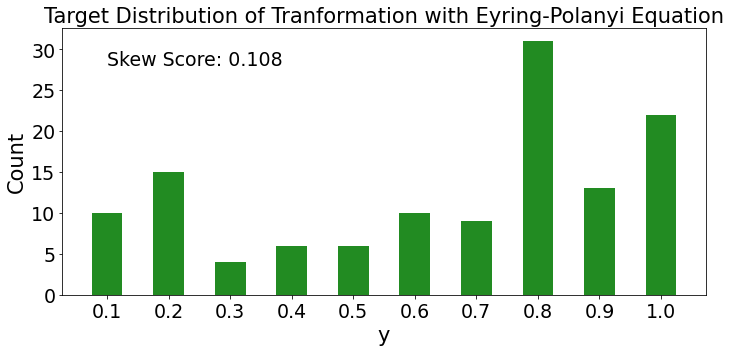

In [4]:
transformed_target = maxminscale(ee2ddG(ee,T))
grouped_value = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1:0}
color = 'forestgreen'
for target in transformed_target:
    for th in grouped_value:
        if target < th:
            grouped_value[th] += 1
            break

x = np.array(list(grouped_value.keys()))
y = np.array([grouped_value[item] for item in grouped_value])
skew_score = np.abs(np.mean(transformed_target)-np.median(transformed_target))
plt.figure(figsize=(10,5))
plt.bar(x,y,width=0.05,color=color)
plt.xlabel("y",fontsize=21)
plt.ylabel("Count",fontsize=21)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"],fontsize=19)
#y_range = list(range(0,max(y)//10 * 10 + 20,10))
plt.yticks(fontsize=19)
plt.text(0.1,28,"Skew Score: %.3f"%skew_score,fontsize=19)
plt.title('Target Distribution of Tranformation with Eyring-Polanyi Equation',fontsize=21)
plt.tick_params(left='on',bottom='on')
plt.tight_layout()


## Box-Cox

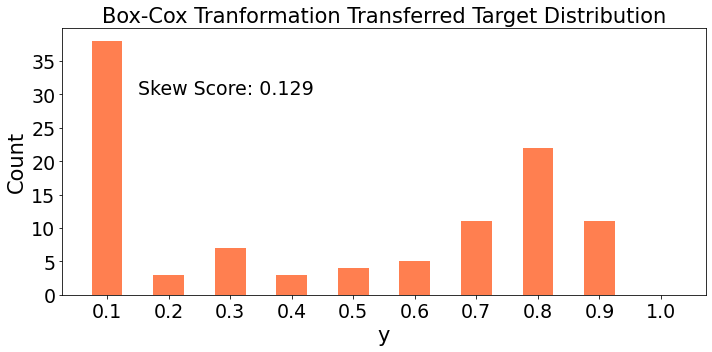

In [5]:
transformed_target = maxminscale(box_cox_trans(ee,15))
grouped_value = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1:0}
color = 'coral'

for target in transformed_target:
    for th in grouped_value:
        if target < th:
            grouped_value[th] += 1
            break

x = np.array(list(grouped_value.keys()))
y = np.array([grouped_value[item] for item in grouped_value])
skew_score = np.abs(np.mean(transformed_target)-np.median(transformed_target))
plt.figure(figsize=(10,5))
plt.bar(x,y,width=0.05,color=color)
plt.xlabel("y",fontsize=21)
plt.ylabel("Count",fontsize=21)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"],fontsize=19)
#y_range = list(range(0,max(y)//10 * 10 + 20,10))
plt.yticks(fontsize=19)
plt.text(0.15,30,"Skew Score: %.3f"%skew_score,fontsize=19)
plt.title('Box-Cox Tranformation Transferred Target Distribution',fontsize=21)
plt.tick_params(left='on',bottom='on')
plt.tight_layout()


## Logarithmic

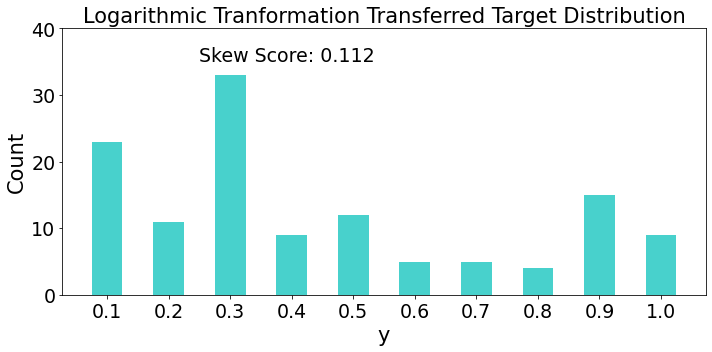

In [6]:
transformed_target = maxminscale(log_trans(ee))
grouped_value = {0.1:0,0.2:0,0.3:0,0.4:0,0.5:0,0.6:0,0.7:0,0.8:0,0.9:0,1:0}
color = 'mediumturquoise'

for target in transformed_target:
    for th in grouped_value:
        if target < th:
            grouped_value[th] += 1
            break

x = np.array(list(grouped_value.keys()))
y = np.array([grouped_value[item] for item in grouped_value])
skew_score = np.abs(np.mean(transformed_target)-np.median(transformed_target))
plt.figure(figsize=(10,5))
plt.bar(x,y,width=0.05,color=color)
plt.xlabel("y",fontsize=21)
plt.ylabel("Count",fontsize=21)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"],fontsize=19)
y_range = list(range(0,max(y)//10 * 10 + 20,10))
plt.yticks(y_range,list(map(str,y_range)),fontsize=19)
plt.text(0.25,35,"Skew Score: %.3f"%skew_score,fontsize=19)
plt.title('Logarithmic Tranformation Transferred Target Distribution',fontsize=21)
plt.tick_params(left='on',bottom='on')
plt.tight_layout()
